# Trabajo Práctico 1

## Cavallero, Guarino y Guerrieri 

1) Utilizando información disponible en la página del INDEC, expliquen brevemente cómo se identifica a las personas desocupadas.

La tasa de desocupación se mide haciendo el cociente entre la cantidad de personas desocupadas sobre la población economicamente activa. Esto significa que solamente estamos contabiliznado las personas sin ocupación que buscan trabajo activamente y están disponibles para trabajar.

2.a) A partir de ahora, cada grupo trabajará con una región del país en específico. En la Tabla (1), encontrarán la región asignada a cada grupo. Eliminen los datos de todas aquellas provincias que no se encuentren dentro de su región y unan ambos trimestres en una sola base.

In [12]:
!pip install pandas pyreadstat openpyxl
import pandas as pd
# Cargar el .dta de 2004
df_2004 = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104.dta")

# Cargar el .xls de 2024
df_2024 = pd.read_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124.xls.xlsx")
df_2004.head(), df_2024.head()

(     CODUSU  nro_hogar componente h15    ano4       trimestre  \
 0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
 1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
 2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
 3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
 4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   
 
               region mas_500              aglomerado  pondera  ... deccfr  \
 0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
 1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
 2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
 3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 
   ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
 0              06      06              04   0.0   0.0   0.0  

In [32]:
# Pasar ambas columnas a mismo type de letra
df_2004.columns = df_2004.columns.str.lower()  # Convertir nombres de columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()

In [33]:
print(df_2004.columns)  # Nombres de columnas en la base 2004
print(df_2024.columns)  # Nombres de columnas en la base 2024

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)


In [34]:
print(df_2004.shape)  # Muestra la cantidad de filas y columnas

(45289, 176)


In [35]:
print(df_2024.shape)  # Muestra la cantidad de filas y columnas

(46050, 177)


In [36]:
# Filtrar solo los datos de la región NOA
df_2004 = df_2004[df_2004["region"] == "NOA"]
df_2024 = df_2024[df_2024["region"] == 40]

In [37]:
print(df_2004.shape)

(9393, 176)


In [38]:
print(df_2024.shape)

(9699, 177)


In [39]:
df_2024.to_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124_filtrado.xlsx", index=False)
df_2004.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado.dta", write_index=False)

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_17484/226776481.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column componente contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_17484/226776481.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column h15 contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_17484/2267

In [40]:
print("Valores en región", df_2004['aglomerado'].unique())

Valores en región ['Santiago del Estero - La Banda', 'Jujuy - Palpalá', 'Gran Catamarca', 'Salta', 'La Rioja', 'Gran Tucumán - Tafí Viejo']
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' ... 'Ciudad de Buenos Aires' < 'Partidos del GBA' < 'Mar del Plata - Batán' < 'Río Cuarto']


In [41]:
# Filtrar en cada base
df_2004 = df_2004[df_2004['aglomerado'].isin(["Jujuy - Palpalá", "Santiago del Estero - La Banda", "Salta"])]
df_2024 = df_2024[df_2024['aglomerado'].isin([18, 19, 23])]

In [42]:
print("dataframe_2004_filtrado", df_2004.shape)
print("dataframe_2024_filtrado", df_2024.shape)

dataframe_2004_filtrado (4801, 176)
dataframe_2024_filtrado (4788, 177)


In [43]:
df_2024.to_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124_filtrado_final.xlsx", index=False)
df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_17484/2296019670.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column componente contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_17484/2296019670.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column h15 contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykerne

In [44]:
# Verificar las columnas disponibles en ambas bases
print("Columnas 2004:", df_2004.columns.tolist())
print("Columnas 2024:", df_2024.columns.tolist())

Columnas 2004: ['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j

In [45]:
# Estandarizar los nombres de las columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()
df_2024.columns = df_2024.columns.str.strip().str.lower()

# Identificar las columnas que existen en ambas bases
columnas_comunes = df_2004.columns.intersection(df_2024.columns)

# Mantener solo las columnas en común
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]

In [46]:
# Unir las bases de datos
df_unificado = pd.concat([df_2004, df_2024], ignore_index=True)

In [47]:
# Convertir columnas tipo object a string para compatibilidad con Stata
for col in df_unificado.select_dtypes(include=['object']).columns:
    df_unificado[col] = df_unificado[col].astype(str)

In [48]:
df_unificado = df_unificado[df_2004.columns]

In [49]:
import pandas as pd
# Guardar en Stata
ruta_salida = r"/Users/zowi/Desktop/Big Data/GitHub/BigData/data_unificado.dta"
df_unificado.to_stata(ruta_salida, write_index=False)

2.b) Antes de arrancar con la limpieza de la base, cree un heatmap mostrando valores faltantes de las diez (10) variables que más les llamó la atención de la EPH.

Elegimos las siguientes variables que consideramos interesantes, según dean relevantes, comparables entre ambos años y que además tengan sentido social, económico o demográfico para mirar valores faltantes. Vale aclarar que el color amarillo representa valores faltantes en el dataset, mientras que el color violeta representa valores existentes (no nulos).

Variable 	Descripción

ch06 	Edad de la persona
 
ch07	Estado civil

ch08	Tipo de cobertura médica

nivel_ed	Nivel educativo alcanzado

estado	Condición de actividad (ocupado, desocupado, inactivo)

cat_ocup	Categoría ocupacional (patrón, cuenta propia, obrero, etc.)

pp03c	Cantidad de ocupaciones

pp3e_tot	Total de horas trabajadas en la ocupación principal

itf	Ingreso total familiar

adecifr	Decil de ingreso total del hogar a nivel aglomerado




In [23]:
#HEATMAP modelo de la tutorial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo Stata (.dta)
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

# Reemplazar 0 y 0.0 por NaN en todas las columnas numéricas
df.replace({0: np.nan, 0.0: np.nan}, inplace=True)

# Calcular el porcentaje de valores faltantes por cada variable
missing_percentage = df.isnull().mean() * 100

# Filtrar las variables que tienen más del 20% de datos faltantes (puedes cambiar este umbral si lo prefieres)
missing_vars = missing_percentage[missing_percentage > 20]

# Mostrar las variables con más de 20% de valores faltantes
print(missing_vars)

pp03d          96.391699
pp3e_tot       63.124413
pp3f_tot       96.475128
pp04b2         97.017416
pp04b3_mes     98.946710
pp04b3_ano     97.841276
pp04b3_dia     99.728856
pp05b2_mes     99.906142
pp05b2_ano     99.478569
pp05b2_dia     99.864428
pp06c          91.500678
pp06d          98.101992
pp08d1         75.200751
pp08d4         99.144853
pp08f1         98.644280
pp08f2         99.780999
pp08j1         95.421838
pp08j2         98.258421
pp08j3         99.812285
pp11b2_mes     99.749713
pp11b2_ano     99.906142
pp11b2_dia     99.864428
pp11g_ano      99.353426
pp11g_mes      98.946710
pp11g_dia      98.977996
p21            64.135989
tot_p12        93.951403
p47t           46.250913
v2_m           87.391803
v3_m           99.927000
v4_m           99.874857
v5_m           96.037126
v8_m           99.530712
v9_m           99.958286
v10_m          99.541141
v11_m          98.258421
v12_m          97.194702
v18_m          99.916571
v19_am        100.000000
v21_m          95.338409


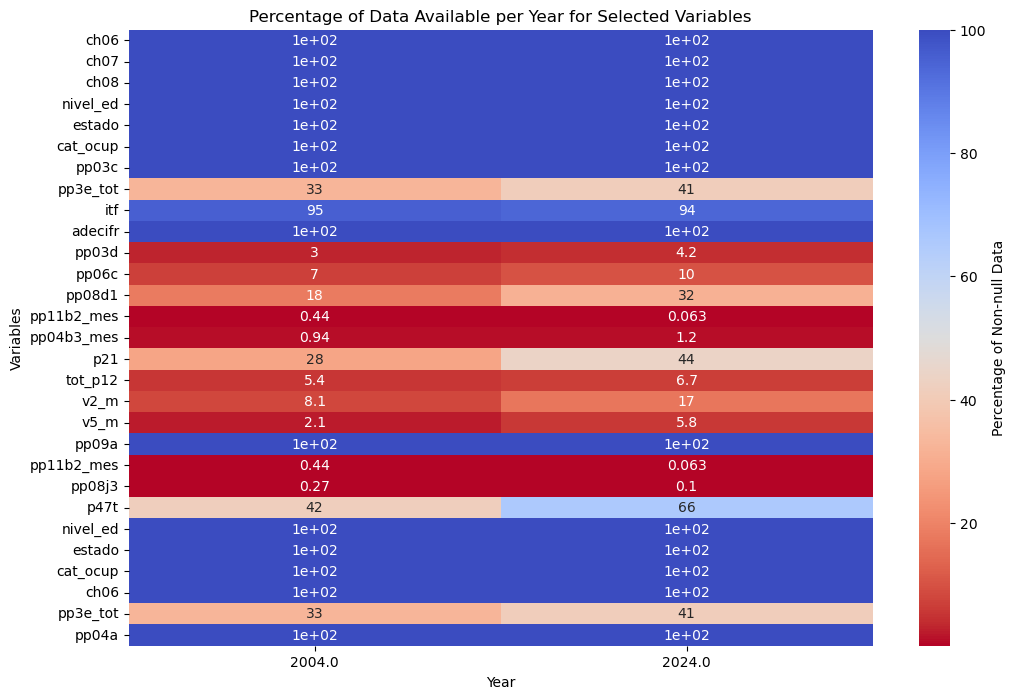

In [29]:
#HEATMAP modelo de la tutorial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo Stata (.dta)
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

# Reemplazar "0" y "0.0" por NaN en todo el DataFrame
df.replace([0, 0.0], np.nan, inplace=True)

# Fijamos la semilla para obtener resultados reproducibles
np.random.seed(123)

# Seleccionamos las 10 variables de interés ==> N
variables_interes = ['ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_ocup', 'pp03c', 'pp3e_tot', 'itf', 'adecifr',
                     'pp03d', 'pp06c', 'pp08d1', 'pp11b2_mes', 'pp04b3_mes', 'p21', 'tot_p12', 'v2_m', 'v5_m', 'pp09a', ]

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Calcular el porcentaje de datos no nulos por año y por variable
percentage_data = df_heatmap.groupby(df['ano4']).apply(lambda x: x.notnull().mean() * 100)

# Transponer para que las variables estén en el eje Y y los años en el eje X
percentage_data = percentage_data.T

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data, annot=True, cmap="coolwarm_r", cbar_kws={'label': 'Percentage of Non-null Data'})
plt.title("Percentage of Data Available per Year for Selected Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()



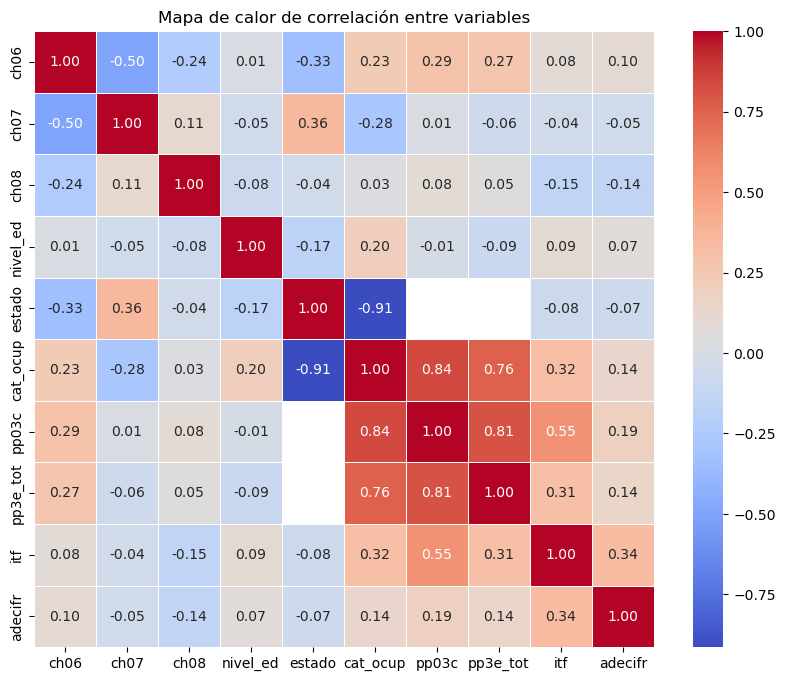

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Stata (.dta)
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")


# Definir las variables de interés
variables_interes = ['ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_ocup', 'pp03c', 'pp3e_tot', 'itf', 'adecifr']

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Convertir a números si hay valores categóricos
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')

# Matriz de correlación
corr_matrix = df_heatmap.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title("Mapa de calor de correlación entre variables")

# Mostrar el gráfico
plt.show()


2.c) Si encuentran observaciones con valores que no tienen sentido (por ejemplo, ingresos negativos o edades negativas), asígnenles valores faltantes (missing values). Se espera que piensen en otros casos de valores sin sentido, no únicamente los mencionados en los ejemplos. Expliquen detalladamente cada decisión que tomen.

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

df[['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot','ch06', 'itf' ]].min()

# Convertirmos a numérico
cols = ['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 
        'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 
        'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot', 'ch06', 'itf']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Reemplazamos valores negativos con NaN
df[cols] = df[cols].where(df[cols] >= 0, np.nan)

# Guardamos la nueva base
df.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_minimos.dta", write_index=False)


In [103]:
#Corroboramos que haya funcionado y no haya valores negativos en nuestras variables que cuentan horas o ingreso
df[['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot','ch06', 'itf' ]].min()

v2_m        0.0
v3_m        0.0
v4_m        0.0
v5_m        0.0
v8_m        0.0
v9_m        0.0
v10_m       0.0
v11_m       0.0
v12_m       0.0
v18_m       0.0
v19_am      0.0
v21_m       0.0
t_vi        0.0
tot_p12     0.0
p47t        0.0
pp08d1      0.0
pp08d4      0.0
pp08f1      0.0
pp08f2      0.0
pp08j1      0.0
pp08j2      0.0
pp08j3      0.0
pp06c       0.0
pp3e_tot    0.0
pp3f_tot    0.0
ch06        1.0
itf         0.0
dtype: float64

2.d) Hagan una limpieza profunda de las bases de datos. Asegúrense de que todas las variables tengan el formato correcto. Comenten todos los cambios hechos para lograr una base limpia y ordenada.

In [87]:
import pandas as pd

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_minimos.dta") 

# Nos fijamos qué columnas tienen datos de distinto tipo en ambas bases

diff_types = {col: (df[col].dtype, df[col].dtype) 
              for col in df.columns if df[col].dtype != df[col].dtype}

for col, (type_04, type_24) in diff_types.items():
    print(f"Columna: {col} → df_04_pamp: {type_04}, df_24_pamp: {type_24}")


# Verificar valores únicos antes de reemplazar (por si hay alguna sorpresa)
print(df['ch04'].unique())

# Reemplazar valores "mujer" por 2 y "varon" por 1
df['ch04'] = df['ch04'].replace({'Mujer': 2, 'Varón': 1})

# Si querés forzar que quede como entero
df['ch04'] = df['ch04'].astype(int)

# Diccionario de reemplazo
mapa_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10,
    '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9, '10': 10
}

# Reemplazar
df['ch03'] = df['ch03'].replace(mapa_ch03)

# Convertir a entero
df['ch03'] = df['ch03'].astype(int)


['Mujer' 'Varón' '1' '2']


In [149]:
import pandas as pd

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_minimos.dta") 

# Nos fijamos qué columnas tienen datos de distinto tipo en ambas bases

diff_types = {col: (df[col].dtype, df[col].dtype) 
              for col in df.columns if df[col].dtype != df[col].dtype}

for col, (type_04, type_24) in diff_types.items():
    print(f"Columna: {col} → df_04_pamp: {type_04}, df_24_pamp: {type_24}")

diccionarios = {
    'ch03': {
        'Jefe': 1,
        'Conyuge/Pareja': 2,
        'Hijo/Hijastro': 3,
        'Yerno/Nuera': 4,
        'Nieto': 5,
        'Madre/Padre': 6,
        'Suegro': 7,
        'Hermano': 8,
        'Otros familiares': 9,
        'No familiares': 10
        '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9, '10': 10
    },
    'ch04': {
        'Varón': 1,
        'Mujer': 2
    },
    'ch07': {
        'Casado': 1,
        'Separado o divorciado': 2,
        'Viudo': 3,
        'Soltero': 4,
        'Unido': 5
    },
    'ch08': {
        'Obra social (incluye PAMI)': 1,
        'Mutual/Prepaga/Servicio de emergencia': 2,
        'Planes y seguros publicos': 3,
        'No paga ni le descuentan': 4,
        'Ns./Nr.': 9,
        'Obra social y mutual/prepaga/servicio..': 12,
        'Obra social y Planes y Seguros Públicos': 13,
        'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos': 23,
        'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123
    },
    'ch09': {
        'Sí': 1,
        'No': 2,
        'Menor de 2 años': 3
    },
    'ch10': {
        'Sí, asiste': 1,
        'No asiste, pero asistió': 2,
        'Nunca asistió': 3
    },
    'ch11': {
        'Público': 1,
        'Privado': 2,
        'Ns./Nr.': 9
    },
    'ch12': {
        'Jardín/preescolar': 1,
        'Primario': 2,
        'EGB': 3,
        'Secundario': 4,
        'Polimodal': 5,
        'Terciario': 6,
        'Universitario': 7,
        'Posgrado Universitario': 8,
        'Educación especial (discapacitado)': 9
    },
    'ch13': {
        'Sí': 1,
        'No': 2,
        'Ns./Nr.': 9
    },
    'ch14': {
        'Ninguno': 0,
        'Primero': 1,
        'Segundo': 2,
        'Tercero': 3,
        'Cuarto': 4,
        'Quinto': 5,
        'Sexto': 6,
        'Séptimo': 7,
        'Octavo': 8,
        'Noveno': 9,
        'Educación especial': 98,
        'Ns./Nr.': 99
    },
    'ch15': {
        'En esta localidad': 1,
        'En otra localidad': 2,
        'En otra provincia (especificar)': 3,
        'En un país limítrofe': 4,
        'En otro país': 5,
        'Ns./Nr.': 9
    },
    'ch16': {   
        'En esta localidad': 1,
        'En otra localidad de esta provincia': 2,
        'En otra provincia (especificar)': 3,
        'En un país limítrofe': 4,
        'En otro país': 5,
        'No había nacido': 6
    },
    'nivel_ed': {
        'Primaria Incompleta (incluye educación especial)': 1,
        'Primaria Completa': 2,
        'Secundaria Incompleta': 3,
        'Secundaria Completa': 4,
        'Superior Universitaria Incompleta': 5,
        'Superior Universitaria Completa': 6,
        'Sin instrucción': 7,
        'Ns./Nr.': 9
    },
    'estado': {
        'Entrevista Cuestionario Individual': 0,
        'Ocupado': 1,
        'Desocupado': 2,
        'Inactivo': 3,
        'Menor de 10 años': 4
    },
    'cat_ocup': {
        'Patrón': 1,
        'Cuenta propia': 2,
        'Obrero o empleado': 3,
        'Trabajador familiar sin remuneración': 4,
        'Ns/Nr': 9
    },
    'cat_inac': {
        'Jubilado/pensionado': 1,
        'Rentista': 2,
        'Estudiante': 3,
        'Ama de casa': 4,
        'Menor de 6 años': 5,
        'Discapacitado': 6,
        'Otros': 7
    },
    'pp02e': {
        'Está suspendido': 1,
        'Ya tiene trabajo asegurado': 2,
        'Se cansó de buscar trabajo': 3,
        'Hay poco trabajo en esta época del año': 4,
        'Por otras razones': 5
    },
    'pp02i': {
        'Sí': 1,
        'No': 2
    },
    'pp02h': {
        'Sí': 1,
        'No': 2
    },
    'pp03c': {
        'Un solo empleo/ocupación/actividad': 1,
        'Más de un empleo/ocupación/actividad': 2
    },
    'pp03g': {
        'Sí': 1,
        'No': 2
    },
    'pp03h': {
        'Podía trabajarlas esa semana': 1,
        'Podía empezar a trabajarlas en dos semanas a más tardar': 2,
        'No podía trabajar más horas': 3
    },
    'pp03i': {
        'Sí': 1,
        'No': 2,
        'Ns/Nr': 9
    },
    'pp03j': {
        'Sí': 1,
        'No': 2,
        'Ns/Nr': 9
    },
    'intensi': {
        'Subocupado por insuficiencia horaria': 1,
        'Ocupado pleno': 2,
        'Sobreocupado': 3,
        'Ocupado que no trabajó en la semana': 4
    },
    'pp04a' : {
        'Estatal': 1,
        'Privada': 2,
        'De otro tipo': 3
    },
    'pp04b1' : {
        'Casa de familia': 1
    },
    'pp04c' : {
        '1 persona': 1,
        '2 personas': 2,
        '3 personas': 3,
        '4 personas': 4,
        '5 personas': 5,
        'De 6 a 10 personas': 6,
        'De 11 a 25 personas': 7,
        'De 26 a 40 personas': 8,
        'De 41 a 100 personas': 9,
        'De 101 a 200 personas': 10,
        'De 201 a 500 personas': 11,
        'Más de 500 personas': 12,
        'Ns/Nr': 99
    },
    'pp04c99': {
        'Hasta 5': 1,
        'De 6 a 40': 2,
        'Más de 40': 3,
        'Ns/Nr': 9
    },
    'pp04g': {
        'Local/oficina/establecimiento/negocio/taller/chacra/finca': 1,
        'Puesto o kiosco fijo callejero': 2,
        'Vehículos (bicicleta, moto, autos, barcos, botes – no transporte)': 3,
        'Vehículo de transporte de personas o mercaderías': 4,
        'Obras en construcción, infraestructura, minería o similares': 5,
        'Esta vivienda (sin lugar exclusivo)': 6,
        'Vivienda del socio o del patrón': 7,
        'Domicilio o local de los clientes': 8,
        'Calle, espacios públicos, ambulante, casa en casa, puesto móvil': 9,
        'Otro lugar': 10
    },
    'pp05c_1': {
        'Propio (del negocio)': 1,
        'Prestado/alquilado': 2,
        'No tiene': 3
    },
    'pp05c_2': {
        'Propio (del negocio)': 1,
        'Prestado/alquilado': 2,
        'No tiene': 3
    },
    'pp05c_3': {
        'Propio (del negocio)': 1,
        'Prestado/alquilado': 2,
        'No tiene': 3
    },
    'pp05e': {
        'Sí': 1,
        'No': 2
    },
    'pp05f': {
        'Un solo cliente (persona, empresa)': 6,
        'Distintos clientes (incluye público en general)': 7
    },
    'pp05h': {
        'menos de 1 mes': 1,
        'de 1 a 3 meses': 2,
        'más de 3 a 6 meses': 3,
        'más de 6 meses a 1 año': 4,
        'más de 1 año': 5
    },
    'pp06a': {
        'No': 1,
        'Sí': 2
    },
    'pp06e': {
        1: "Es una sociedad jurídicamente constituida (SA, SRL, Co",
        2: "Es una sociedad de otra forma legal?",
        3: "O es una sociedad convenida de palabra?"
    },
    'pp06h': {
        'Sí': 1,
        'No': 2
    }
}  

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2681541360.py, line 25)

In [151]:
import pandas as pd
import numpy as np

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_minimos.dta") 

# Función para reemplazar valores de acuerdo con el diccionario, con manejo de valores no encontrados
def reemplazar_valores(columna, diccionario):
    # Verificar valores únicos antes de reemplazar
    print(f"Valores únicos en la columna '{columna.name}': {columna.unique()}")
    return columna.map(diccionario).fillna(0)

# Aplicar el reemplazo de valores y conversión a cada columna basada en el diccionario
for col, dicc in diccionarios.items():
    # Llamamos la función para reemplazar valores, y mostramos los valores únicos antes
    df[col] = reemplazar_valores(df[col], dicc)
    df[col] = df[col].astype(int)  # Convertir a entero

# Eliminamos duplicados basados en las tres variables de identificación, manteniendo solo una observación
df = df.drop_duplicates(subset=['codusu', 'nro_hogar', 'ano4'], keep='first')

# Guardamos la base sin duplicados
df.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_sin_duplicados.dta", write_index=False)

# Convertimos a formato numérico las variables necesarias
cols = ['ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 
        'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod']

# Aplicamos la conversión a numérico, manejando errores
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Guardamos la base limpia
df.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/data_unificado_limpia.dta", write_index=False)

df['ch03_mapped'] = df['ch03'].map(diccionarios['ch03'])
print(df[df['ch03_mapped'].isna()]['ch03'])

Valores únicos en la columna 'ch03': ['Jefe' 'Cónyuge/Pareja' 'Hijo/Hijastro' 'Nieto' 'Madre/Padre' 'Hermano'
 'Otros familiares' 'Yerno/Nuera' 'No familiares' 'Suegro' '1' '2' '3' '5'
 '8' '6' '9' '4' '10' '7']
Valores únicos en la columna 'ch04': ['Mujer' 'Varón' '1' '2']
Valores únicos en la columna 'ch07': ['Separado o divorciado' 'Unido' 'Soltero' 'Casado' 'Viudo' '3' '5' '2'
 '1' '4']
Valores únicos en la columna 'ch08': ['Obra social y mutual/prepaga/servicio de emergencia'
 'No paga ni le descuentan' 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social (incluye PAMI)' 'Ns./Nr.' 'Planes y seguros públicos' '1'
 '4' '2' '3' '13' '23' '12' '9']
Valores únicos en la columna 'ch09': ['Sí' 'No' 'Menor de 2 años' '1' '2' '3']
Valores únicos en la columna 'ch10': ['No asiste, pero asistió' 'Sí, asiste' 'Nunca asistió' '0.0' '2' '1' '3'
 '0']
Valores únicos en la columna 'ch11': ['0.0' 'Público' 'Privado' 'Ns./Nr.' '0' '1' '2']
Valores únicos en la columna 'ch12': ['Primario' 'Secundar

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_28130/3444583715.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return columna.map(diccionario).fillna(0)


0       1
1       1
6       1
11      1
15      1
       ..
9566    0
9573    0
9579    0
9582    0
9586    0
Name: ch03, Length: 2610, dtype: int64


/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_28130/3444583715.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ch03_mapped'] = df['ch03'].map(diccionarios['ch03'])


2e) Una vez hecha la limpieza, hagan un heatmap mostrando los valores faltantes de las variables de las diez (10) variables que eligieron en el inciso b. Ahora tiene un heatmap antes y después de la limpieza ¿Observan algún patrón interesante? ¿Alguna de sus variables de interés presenta muchos NAs?  
### FALTA hacer

## Parte 2 - Análisis exploratorio


In [111]:
import matplotlib.pyplot as plt

df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/data_unificado_limpia.dta") 

# Calcular frecuencias absolutas
tabla_abs = (
    df.groupby(['ano4', 'ch04'])
    .size()
    .reset_index(name='count')
)

# Pivotear la tabla
tabla_abs = tabla_abs.pivot(index='ano4', columns='ch04', values='count')
tabla_abs.columns = ['Varones', 'Mujeres']

# Gráfico de barras
tabla_abs.plot(kind='bar', color=['#4A90E2', '#E94E77'])
plt.title('Composición por sexo (frecuencias absolutas)')
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()



ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_limpia.dta") 

# Asegurar que ano4 sea entero
df['ano4'] = df['ano4'].astype(int)
print(df.groupby(['ano4', 'ch04']).size())

# Reordenar y asegurar que estén ambos años (2004 y 2024)
tabla_abs = tabla_abs.reindex([2004, 2024], fill_value=0)

print(df[df['ano4'] == 2004]['ch04'].unique())

# Verificar la tabla después de reindexar
print(tabla_abs)

ano4  ch04
2004  1       751
      2       404
2024  1       729
      2       726
dtype: int64
[2 1]
      Varones  Mujeres
ano4                  
2004      751      404
2024      729      726


In [ ]:
# Verificar el número de observaciones para 2004 y 2024
print(df[df['ano4'] == 2004].shape)
print(df[df['ano4'] == 2024].shape)
# Verificar si hay valores nulos en ch04 para el año 2004
print(df[df['ano4'] == 2004]['ch04'].isnull().sum())

(1155, 172)
(1455, 172)
0
